In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from google.colab import files

In [740]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor,AdaBoostRegressor

In [3]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor

In [38]:
from sklearn.preprocessing import  PolynomialFeatures

In [666]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [667]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [668]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


### checking for missing values

In [669]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

### filling missing values with zero

In [670]:
# fill missing values
train = train.fillna(0)
test = test.fillna(0)

train['feat1'] = (train.high + train.low)/2  -  train.open 
test['feat1'] = (test.high  + test.low)/2  -  test.open 

In [671]:
train.isnull().sum()

id                         0
asset_id                   0
open                       0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
news                       0
price_score                0
social_impact_

In [672]:
# fill missing values
train = train.fillna(0)
test = test.fillna(0)








### checking for duplicates

In [673]:
### dropping all missing

In [674]:
for col in train.columns[1:]:
    mean_value = train[col].mean()
    #print(mean_value)
   
    if col != 'close':
        train[col] =  train[col].fillna(mean_value)
        test[col] =  test[col].fillna(mean_value)

In [675]:
# fill missing values
train = train.fillna(0)
test = test.fillna(0)

In [676]:
drop_frac =  train[train.close == 0]
train = train[train.close != 0]

In [677]:
drop_frac = drop_frac.sample(n =  100,random_state=42)

In [678]:
train = pd.concat([train,drop_frac],axis=  0).reset_index(drop  = True)

In [679]:
train.id.nunique()

8717

In [680]:
test.id.nunique()

6222

In [681]:
train.describe()['close']

count     8717.000000
mean     15329.497555
std      14128.071158
min          0.000000
25%       8339.842936
50%       9636.754310
75%      12968.370271
max      61259.670876
Name: close, dtype: float64

In [682]:
train.describe()['open']['std']

14121.42798375728

In [683]:
std_col = []
for col  in train.describe().columns:
    std = train.describe()[col]['std']
    if std > 50 and col != 'close':
        std_col.append(col)

In [684]:
len(std_col)

31

std_col

### dataset to scale

In [685]:
to_scale = ['open','high','low']

In [686]:
not_to_scale = train.columns.difference(std_col +['close','id'])

In [687]:
def data_to_scale(train,test,std_col):
    scaled_train = np.log1p(train[std_col])
    scaled_test = np.log1p(test[std_col])
    return scaled_train,scaled_test

In [688]:
def data_not_to_scale(train,test,not_to_scale):
    unscaled_train =  train[not_to_scale]
    unscaled_test =  test[not_to_scale]
    return unscaled_train,unscaled_test

In [689]:
def merge_data(train,test,std_col,not_to_scale):
    train1,test1 = data_to_scale(train,test,std_col)
    train2,test2 = data_not_to_scale(train,test,not_to_scale)
    tot_train = pd.concat([train1,train2],axis=  1)
    tot_test =  pd.concat([test1,test2],axis = 1)
    return tot_train,tot_test

tot_train.describe()

In [690]:
not_to_scale

Index(['asset_id', 'average_sentiment', 'correlation_rank', 'galaxy_score',
       'market_cap_rank', 'medium', 'news', 'percent_change_24h',
       'price_score', 'reddit_posts', 'social_impact_score',
       'social_score_24h_rank', 'social_volume_24h_rank', 'volatility',
       'volume_24h_rank', 'youtube'],
      dtype='object')

X[std_col]

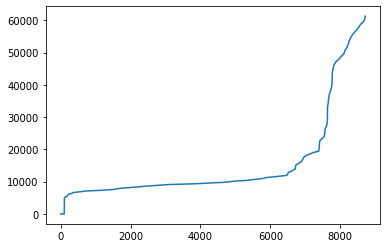

In [691]:
train.sort_values(by = 'close').reset_index()['close'].plot()

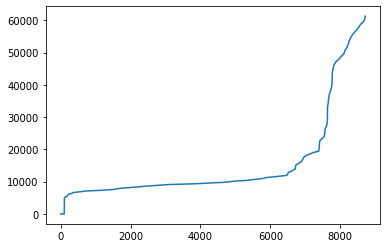

In [692]:
train.sort_values(by = 'close').reset_index()['close'].plot()

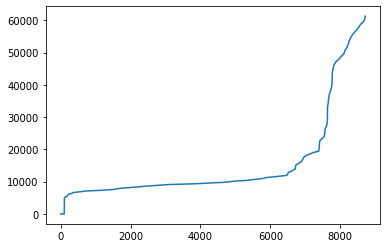

In [693]:
train.sort_values(by = 'close').reset_index()['close'].plot()

In [66]:
train.close.skew()

2.2433898274427846

In [67]:
train.close.apply(np.log1p).skew()

-0.7374060664611249

### checking for correlation

In [118]:
import seaborn as sns

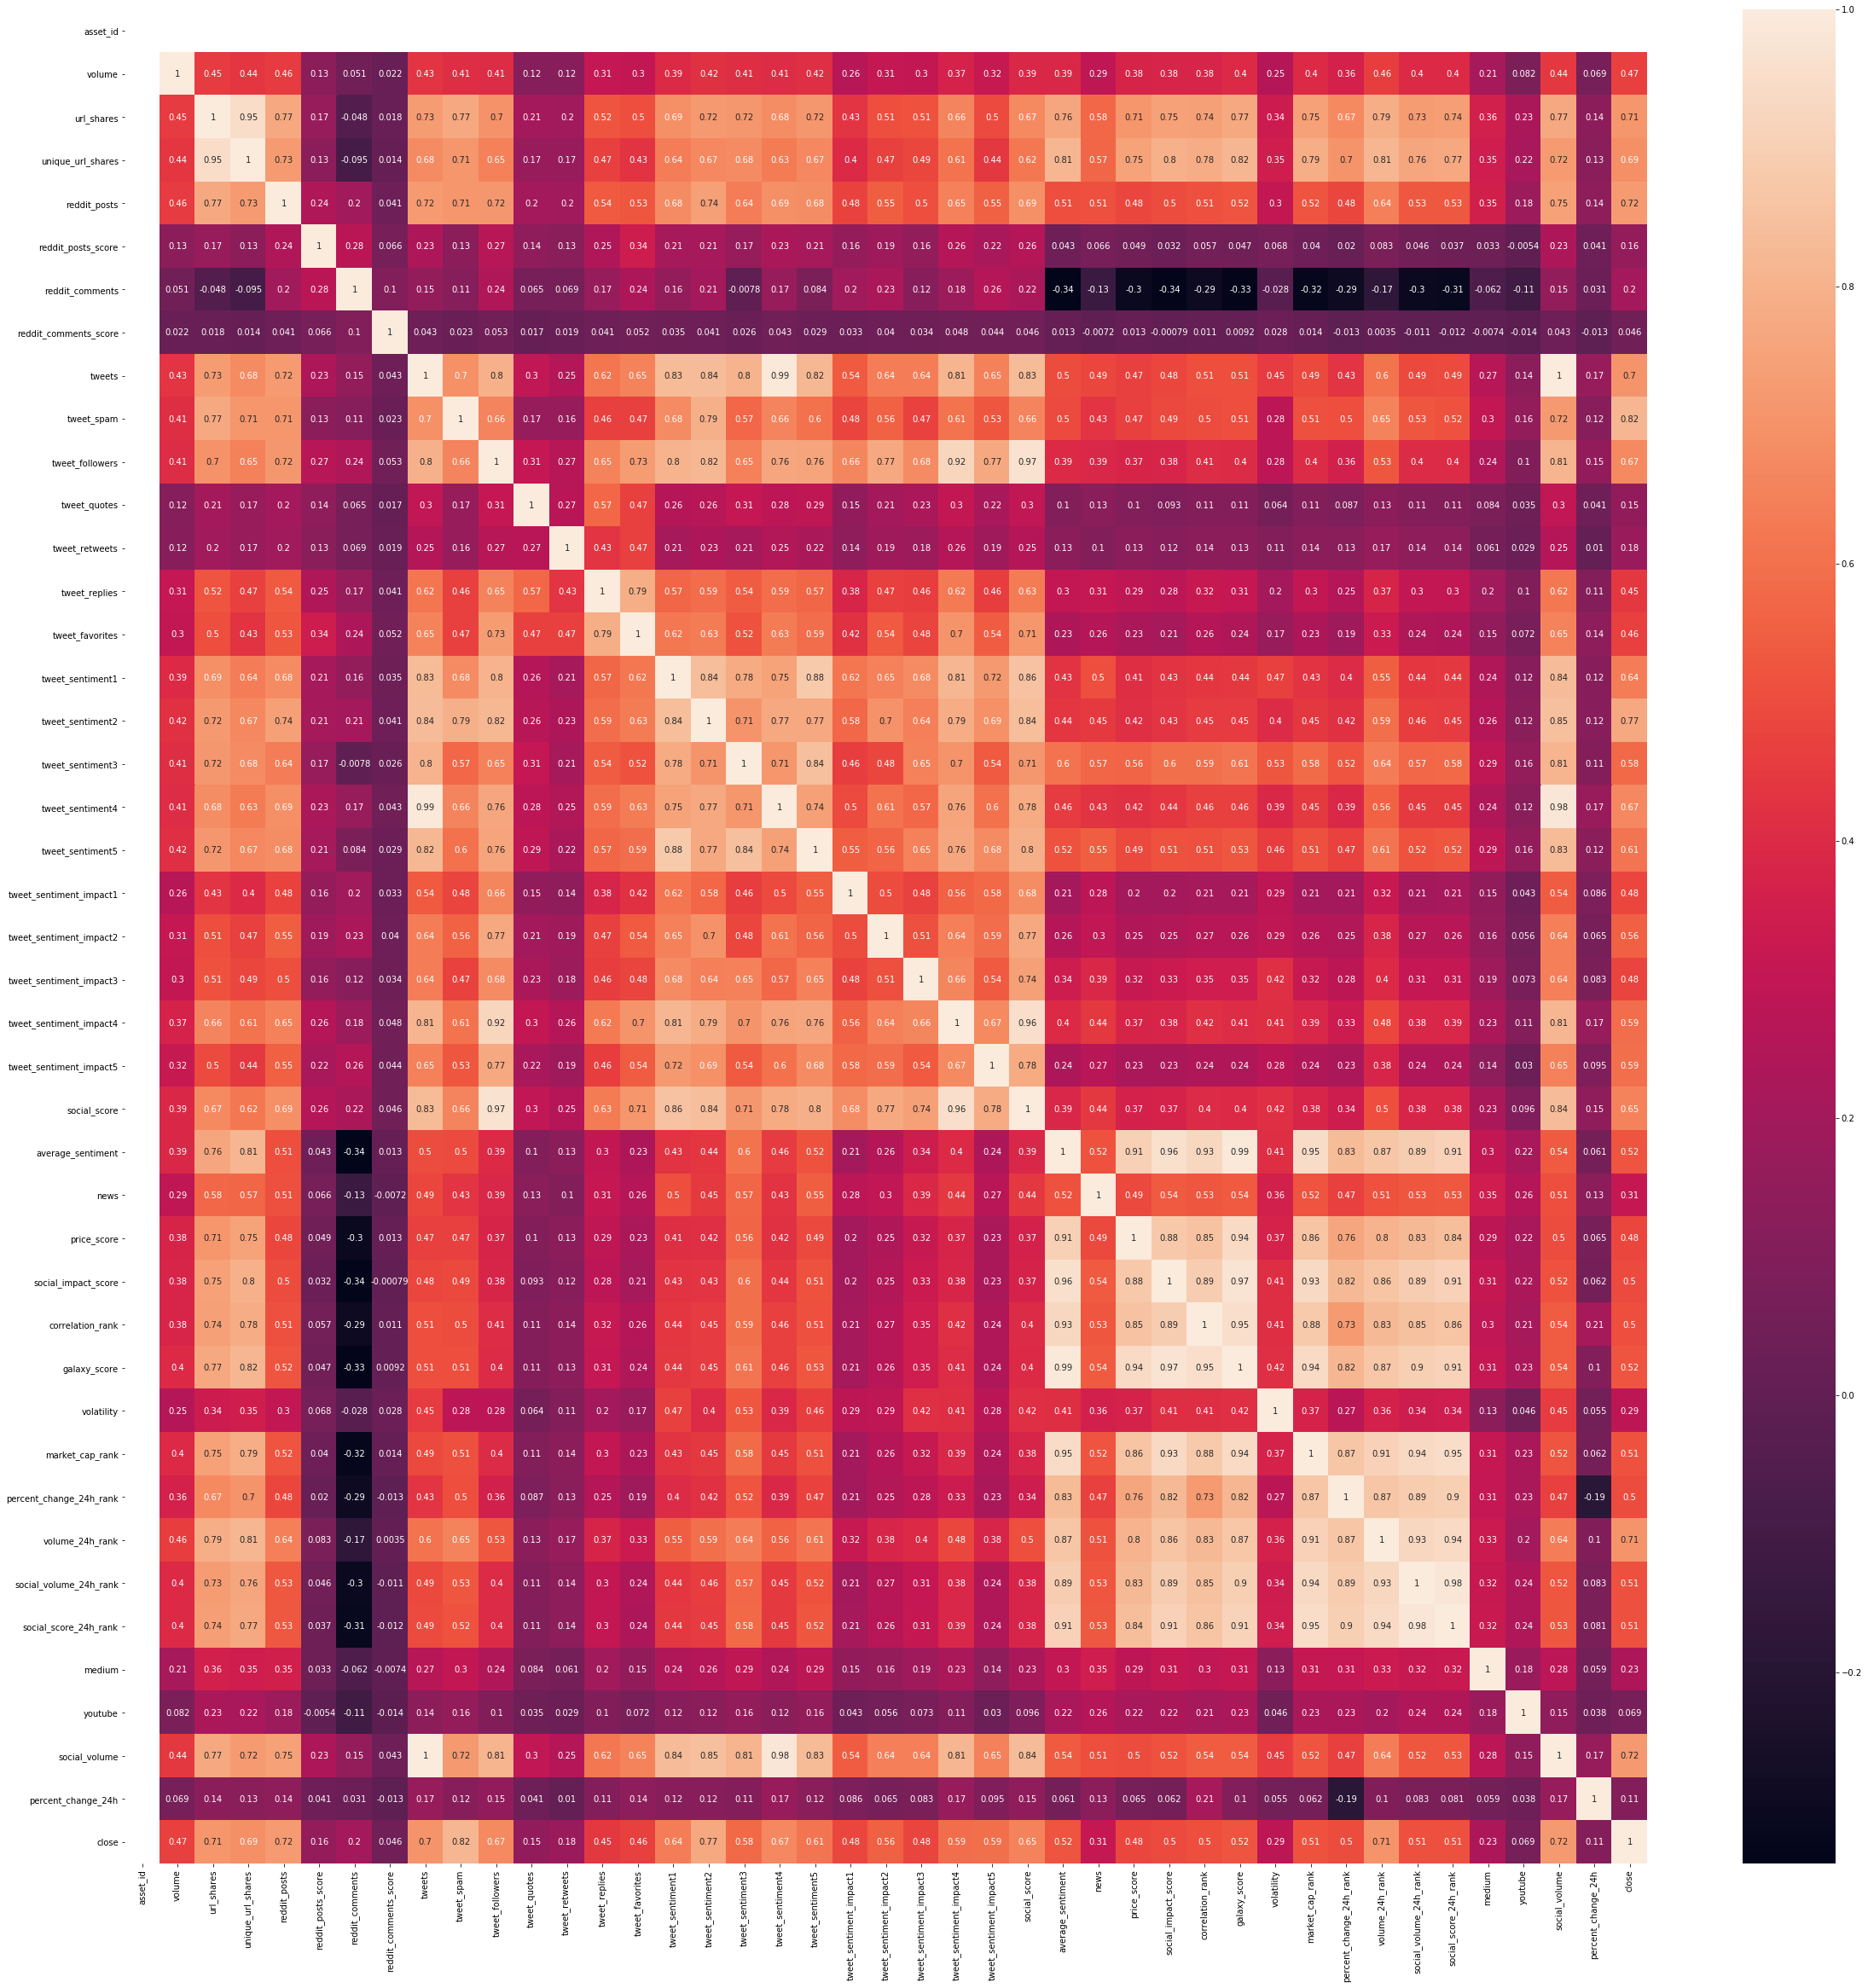

In [126]:
plt.figure(figsize = (40,40))
sns.heatmap(train.corr(),annot = True)

In [224]:
train.corr()['close']

asset_id                        NaN
open                       0.999937
high                       0.999971
low                        0.999956
volume                     0.343811
market_cap                 0.964796
url_shares                 0.569744
unique_url_shares          0.531873
reddit_posts               0.643025
reddit_posts_score         0.199759
reddit_comments            0.667416
reddit_comments_score      0.043653
tweets                     0.602051
tweet_spam                 0.754757
tweet_followers            0.601075
tweet_quotes               0.112784
tweet_retweets             0.130140
tweet_replies              0.359546
tweet_favorites            0.416081
tweet_sentiment1           0.537707
tweet_sentiment2           0.704105
tweet_sentiment3           0.394870
tweet_sentiment4           0.573670
tweet_sentiment5           0.474156
tweet_sentiment_impact1    0.452298
tweet_sentiment_impact2    0.511846
tweet_sentiment_impact3    0.380166
tweet_sentiment_impact4    0

In [109]:
train

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,0.0,0.0,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,285,0.000000,0.000000e+00,0.000000
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,0.0,2.0,3996,2.609576,3.386925e+11,10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,ID_zybd4H,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,140,0.000000,0.000000e+00,0.000000
12628,ID_zydeys,1,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,...,1007.0,2.0,1.0,1.0,0.0,0.0,2020,0.000000,1.978198e+11,7303.640282
12629,ID_zyfj4W,1,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,...,918.0,2.0,1.0,1.0,1.0,2.0,5787,0.000000,2.493421e+11,8828.440234
12630,ID_zz5eGB,1,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,...,603.0,2.0,1.0,1.0,0.0,9.0,4679,2.706432,2.757547e+11,9658.204385


train = train.drop(['open','high','low','market_cap_global','market_cap'],axis=  1)
test = test.drop(['open','high','low','market_cap_global','market_cap'],axis=  1)

# baseline

In [561]:
X

,asset_id,average_sentiment,correlation_rank,feat1,galaxy_score,high,low,market_cap,market_cap_global,market_cap_rank,...,tweet_sentiment_impact4,tweet_sentiment_impact5,tweet_spam,tweets,unique_url_shares,url_shares,volatility,volume,volume_24h_rank,youtube
0,1,3.6,3.3,2.820773,66.0,9428.490628,9422.849081,1.737635e+11,2.818066e+11,1.0,...,8406185.0,281329.0,1671.0,3420.0,817.0,1689.0,0.007118,7.131986e+08,2.0,5.0
1,1,3.7,1.0,-5.545686,43.5,7992.059917,7967.567267,1.426942e+11,2.126897e+11,1.0,...,3754815.0,80010.0,242.0,1491.0,544.0,920.0,0.009419,4.004755e+08,0.0,0.0
2,1,3.7,3.3,29.291504,65.5,49394.593518,49068.057046,9.166977e+11,1.530712e+12,1.0,...,25510267.0,5110490.0,4013.0,9346.0,975.0,1446.0,0.013530,3.017729e+09,3.0,0.0
3,1,3.7,4.4,-75.469451,83.0,10535.737119,10384.798216,1.921183e+11,3.386925e+11,1.0,...,10964321.0,440730.0,1652.0,3262.0,638.0,1012.0,0.010332,1.150053e+09,2.0,2.0
4,1,3.7,3.1,7.498232,66.5,9712.247413,9697.250948,1.767035e+11,2.807819e+11,1.0,...,25743321.0,611152.0,401.0,3890.0,661.0,1079.0,0.008594,1.231231e+09,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8712,1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
8713,1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
8714,1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0
8715,1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.0


In [701]:
# Select main columns to be used in training
main_cols = train.columns.difference(['id', 'close'])
X = train[main_cols]
tot_train,tot_test = merge_data(X,test,std_col,not_to_scale)
'''poly = PolynomialFeatures(include_bias =False)
poly.fit(tot_train)
poly_train = pd.DataFrame(poly.transform(tot_train))
poly_test = pd.DataFrame(poly.transform(tot_test))'''

y = train.close.astype(float)
y_ = np.log1p(y)
# Split data into train and test sets
X_train, X_test, y_train_, y_test_ = train_test_split(X,y,test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(tot_train,y_,test_size=0.2, random_state=42)

In [702]:
tot_train.shape,poly_train.shape

((8717, 47), (8717, 1224))

### linear regression

In [703]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.002344269374627278

In [704]:
y_test_.head()

6260     8058.824281
3457    52708.897058
6443     7117.973022
8409     9840.785500
2166    13224.799707
Name: close, dtype: float64

In [705]:
1.16900718e+04

11690.0718

In [706]:
np.exp(y_pred)

array([ 8074.73130264, 52919.26245175,  7121.94866356, ...,
       11904.1995319 ,  9214.3727905 , 46488.12968756])

In [707]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred)))

70.4807133961049

In [26]:
# Make predictions in test set and prepare submission file
predictions = lm2.predict(test[main_cols])
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('lr_10_.csv', index = False)

In [566]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.48105670805496403

### KNN

In [708]:
# Instantiate model
lm2 = KNeighborsRegressor(5)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.2512405344529464

### SVC

In [709]:
# Instantiate model
lm2 = LinearSVR(random_state =  42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.004284653831025961

In [711]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred)))

102.1697522086438

### DT

In [712]:
# Instantiate model
lm2 = DecisionTreeRegressor(random_state = 42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.004326612704405146

In [713]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred)))

97.07486310449583

In [710]:
np.exp(5.84354441703136)

345.00000000000017

### RF

In [716]:
%%time
# Instantiate model
lm2 = RandomForestRegressor(n_estimators =500,random_state = 42,n_jobs = -1)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

Wall time: 46.9 s


0.003037515669448062

In [715]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred))-1)

67.58697751673265

In [718]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred))-1)

67.06791988929353

In [112]:
%%time
# Instantiate model
lm2 = RandomForestRegressor(n_estimators =100,random_state = 42,n_jobs = -1)
# Fit Model
lm2.fit(X_train, y_train_)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test_,y_pred))

Wall time: 8.81 s


68.19028595416438

In [115]:
# Make predictions in test set and prepare submission file
predictions = np.exp(lm2.predict(test[main_cols])) - 1
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('rf_20_lg_scaled.csv', index = False)

In [112]:
# Make predictions in test set and prepare submission file
predictions = lm2.predict(test[main_cols])
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('rf_20_unscaled.csv', index = False)

In [116]:
# Instantiate model
lm2 = RandomForestRegressor(n_estimators =100,random_state = 42,n_jobs = -1)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1855.3790040184433

### Gb

In [177]:
# Instantiate model
lm2 = GradientBoostingRegressor(random_state = 42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.0060052810678911574

In [179]:
%%time
# Instantiate model
lm2 = GradientBoostingRegressor(random_state = 42)
# Fit Model
lm2.fit(X_train, y_train_)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test_,y_pred))

Wall time: 8.51 s


99.89927285097129

In [180]:
%%time
# Instantiate model
lm2 = LGBMRegressor(random_state = 42)
# Fit Model
lm2.fit(X_train, y_train_)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test_,y_pred))

Wall time: 934 ms


140.1192453773326

### LightGBM

In [187]:
58.845029 - 63.2497579

-4.404728900000002

In [232]:
# Instantiate model
lm2 = LGBMRegressor(random_state=42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.005557470300557202

In [725]:
%%time
# Instantiate model
lm2 = ExtraTreesRegressor(random_state=42,n_estimators = 100)
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

Wall time: 8.63 s


0.002860589956448586

In [726]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred))-1)

64.93341811596434

In [724]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred))-1)

64.32372012213166

In [741]:
%%time
# Instantiate model
lm2 = AdaBoostRegressor(random_state=42)
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

Wall time: 1.78 s


0.06619532863657795

In [742]:
np.sqrt(mean_squared_error(y_test_,np.exp(y_pred))-1)

1685.5722467534247

In [190]:
# Make predictions in test set and prepare submission file
predictions = np.exp(lm2.predict(test[main_cols])) - 1
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('et_20_lg_all_scaled.csv', index = False)

In [186]:
%%time
# Instantiate model
lm2 = ExtraTreesRegressor(random_state = 42)
# Fit Model
lm2.fit(X_train, y_train_)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test_,y_pred))

Wall time: 8.82 s


61.22997073312075

In [117]:
# Instantiate model
lm2 = LGBMRegressor(random_state=42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1847.546659398281

### XG

In [379]:
# Instantiate model
lm2 = XGBRegressor(random_state=42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.004982509231693254

In [99]:
# Instantiate model
lm2 = XGBRegressor(random_state=42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

129.51938797272638

### CB

In [63]:
# Instantiate model
lm2 = CatBoostRegressor(verbose = False,random_state=42)
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

189.2231537777919

In [59]:
# Make predictions in test set and prepare submission file
predictions = lm2.predict(test[main_cols])
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('gbm_30_.csv', index = False)

In [115]:
def cross_validation(X,y,test,model,folds = 5,random_state =  42):
    np.random.seed(42)
    kf = KFold(n_splits=folds,shuffle=True, random_state=random_state) 
    y_copy = y.copy()
    total_test_pred = []
    for train_index, test_index in kf.split(X):
        #print("Train:", train_index, "Validation:",test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #ros = RandomOverSampler(random_state=42)
        #X_train, y_train = ros.fit_resample(X_train, y_train)
        
        model.fit(X_train,y_train)
        
        val_pred  = model.predict(X_test)
        y_copy.iloc[test_index] = val_pred
        print('RMSE',np.sqrt(mean_squared_error(y_test,val_pred)))
        test_pred = model.predict(test)
        total_test_pred.append(test_pred)
    total_test_pred = np.mean(total_test_pred,axis = 0)
    print('tot_RMSE', np.sqrt(mean_squared_error(y,y_copy)))
    return y_copy,total_test_pred

In [116]:
tot_val_lr.shape,y.shape

((8717,), (8717,))

In [663]:
%%time
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,LinearRegression(),10)

RMSE 0.0021146835515470676
RMSE 0.0023842609900721103
RMSE 0.0019875791547779285
RMSE 0.0022187560929759075
RMSE 0.002303325439528827
RMSE 0.0029200365224017867
RMSE 0.0023843138845784247
RMSE 0.0021992058450209864
RMSE 0.0024734655993295784
RMSE 0.001960341137459753
tot_RMSE 0.002309668392651786
Wall time: 717 ms


%%time
tot_val_lr,tot_test_lr = cross_validation(poly_train,y_,poly_test,LinearRegression(),10)

In [664]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

71.56086356426383

In [467]:
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,ExtraTreesRegressor(random_state = 42),10)

RMSE 0.002615777229251625
RMSE 0.002988203385534724


KeyboardInterrupt: 

In [322]:
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,ExtraTreesRegressor(random_state = 42),10)

RMSE 0.008240832481178169
RMSE 0.039056571645951686
RMSE 0.04071977111076908
RMSE 0.003346329482398174
RMSE 0.039356817991016424
RMSE 0.004127357548793167
RMSE 0.0031730949069787347
RMSE 0.004315646775978158
RMSE 0.003927301257037916
RMSE 0.004251077048726919
tot_RMSE 0.022116271546570872


tot_val_lr,tot_test_lr = cross_validation(poly_train,y_,poly_test,ExtraTreesRegressor(random_state = 42),5)

In [497]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

82.97073986759274

In [81]:
np.sqrt(mVotingRegressorn_squared_error(y,np.exp(tot_val_lr) -1 ))

69.69864924611505

In [383]:
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,ExtraTreesRegressor(random_state = 42),10)

RMSE 0.0026844597178533086
RMSE 0.0029785613659230846
RMSE 0.0027905638274298775
RMSE 0.002869278129235801
RMSE 0.002697987865799666
RMSE 0.002578732610435748
RMSE 0.0033272386258937593
RMSE 0.0025527555360962866
RMSE 0.002568209029743097
RMSE 0.0025991440837946607
tot_RMSE 0.0027743319371031534


In [386]:
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,RandomForestRegressor(random_state = 42),10)

RMSE 0.0028084688121868227
RMSE 0.0030520280294739433
RMSE 0.004381843019979198
RMSE 0.0027903112902163863
RMSE 0.002627191505583604
RMSE 0.0028072771589795482
RMSE 0.003703171328614986
RMSE 0.003072171696700162
RMSE 0.002800515386352081
RMSE 0.0027005616448944154
tot_RMSE 0.0031187275520124804


In [395]:
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,XGBRegressor(verbose = False,random_state = 42),10)

RMSE 0.00502035777482303
RMSE 0.005105831265101364
RMSE 0.007646225693593798
RMSE 0.005469575835292122
RMSE 0.004405800279869018
RMSE 0.005962966066022246
RMSE 0.006902199220059419
RMSE 0.004075383817623736
RMSE 0.005026267952550699
RMSE 0.004872741002820284
tot_RMSE 0.005548957912479052


In [396]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

130.0224982797379

In [405]:
%%time
mod1 = RandomForestRegressor(random_state= 42)
mod2 = ExtraTreesRegressor(random_state = 42)

vot_mod = VotingRegressor(estimators=[('er',mod1),('ood',mod2)])
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,vot_mod,10)

RMSE 0.002685886218336374
RMSE 0.002957394296452922
RMSE 0.003244435179387182
RMSE 0.002705764974583774
RMSE 0.002584699674797053
RMSE 0.002636295408094403
RMSE 0.0034542389124635983
RMSE 0.0027132599531592694
RMSE 0.002611837876077752
RMSE 0.0025841431294560653
tot_RMSE 0.002832580706997608
Wall time: 6min 22s


In [496]:
%%time
mod1 = RandomForestRegressor(random_state= 42)
mod2 = ExtraTreesRegressor(random_state = 42)
mod3 = LinearRegression()
vot_mod = VotingRegressor(estimators=[('er',mod1),('ood',mod2),('lr',mod3)])
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,vot_mod,10)

RMSE 0.0022669040913046784
RMSE 0.0025659706461111224
RMSE 0.0031566551211332774
RMSE 0.028907170690964056
RMSE 0.0022545245089366033
RMSE 0.0024483550091246235
RMSE 0.002997760440475405
RMSE 0.0022646243306930812
RMSE 0.0022272190475846857
RMSE 0.002319004550821002
tot_RMSE 0.009450567614496022
Wall time: 5min 46s


In [408]:
%%time
mod1 = RandomForestRegressor(random_state= 42)
mod2 = ExtraTreesRegressor(random_state = 42)
mod3 = LinearRegression()
vot_mod = VotingRegressor(estimators=[('er',mod1),('ood',mod2),('lr',mod3)])
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,vot_mod,10)

RMSE 0.0022766054570177554
RMSE 0.00253808198977058
RMSE 0.002617123146771358
RMSE 0.0021345291722387316
RMSE 0.0022371282843081414
RMSE 0.0022055823216080295
RMSE 0.0030414496447529115
RMSE 0.0022781868033427363
RMSE 0.002189342022457784
RMSE 0.0023412684107343273
tot_RMSE 0.002400355640711446
Wall time: 11min 10s


In [ ]:
%%time
mod1 = RandomForestRegressor(n_jobs = -1,n_estimators = 500,random_state= 42)
mod2 = ExtraTreesRegressor(n_jobs = -1,random_state = 42)
mod3 = LinearRegression()

vot_mod = VotingRegressor(estimators=[('er',mod1),('ood',mod2),('lr',mod3)],n_jobs  = -1)
tot_val_lr,tot_test_lr = cross_validation(tot_train,y_,tot_test,BaggingRegressor(vot_mod,random_state=42),10)

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [619]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

52.58861290199315

In [410]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

61.11457326122819

In [620]:
sub_file = ss.copy()
sub_file.close = np.exp(tot_test_lr)  - 1
sub_file.to_csv('cv_10_vt_lr_rf_et_all_scaled_null_all_.csv', index = False)

In [121]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

67.65964899770728

In [119]:
tot_val_lr,tot_test_lr = cross_validation(X,y_,tot_test,ExtraTreesRegressor(random_state = 42),10)

RMSE 0.0025745061651575923
RMSE 0.011906669530015498


KeyboardInterrupt: 

In [83]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

71.65058106039749

In [327]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

67.56820250517346

In [239]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

67.65964899770728

In [193]:
np.sqrt(mean_squared_error(y,np.exp(tot_val_lr) -1 ))

56.8454359896347

In [407]:
# Make predictions in test set and prepare submission file

sub_file = ss.copy()
sub_file.close = np.exp(tot_test_lr)  - 1
sub_file.to_csv('cv_10_vt_rf_et_all_scaled_null_100_.csv', index = False)

In [195]:
63.2497579717049  -  58.845029

4.404728971704905

In [196]:
56.84543 - 51.22891

5.616520000000001

In [428]:
one = pd.read_csv('cv_10_vt_lr_rf_et_all_scaled_null_100_.csv')
two = pd.read_csv('blend_et_rf73.csv')

In [425]:
0.7* one.close + 0.3*two.close

0       7.655057e-05
1       1.135234e+04
2       6.313431e+03
3      -8.562818e-07
4       6.723231e-05
            ...     
6217    8.268345e+03
6218    1.086933e+04
6219   -2.905562e-06
6220    1.223166e-04
6221    7.063232e+03
Name: close, Length: 6222, dtype: float64

In [430]:
# Make predictions in test set and prepare submission file

sub_file = ss.copy()
sub_file.close = 0.9* one.close + 0.1*two.close
sub_file.to_csv('blend_vt1_bl1_91.csv', index = False)

In [400]:
two.head()

,id,close
0,ID_323Sn2,0.000000
1,ID_325SNW,11354.560104
2,ID_325uzE,6312.795413
3,ID_328qCx,0.000000
4,ID_3293uJ,0.000000


In [33]:
kf = KFold(n_splits=2) 

In [36]:
X = [ x for x in range(11,21)]

In [42]:
X = pd.Series(X)
X

0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
9    20
dtype: int64

In [44]:
n = 1
for train_index, test_index in kf.split(X):
    print('iteration ::::::' , n)
    print('train_indext ::::: ',train_index)
    print('test_indext ::::: ',test_index)
    n+=1

iteration :::::: 1
train_indext :::::  [5 6 7 8 9]
test_indext :::::  [0 1 2 3 4]
iteration :::::: 2
train_indext :::::  [0 1 2 3 4]
test_indext :::::  [5 6 7 8 9]
